In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, GradientBoostingRegressor, GradientBoostingClassifier, StackingRegressor, StackingClassifier
from math import sqrt
from sklearn.linear_model import LinearRegression
import xgboost
import lightgbm
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
def objective(trial, X_train, y_train, X_test, y_test, task_type):

    max_depth = trial.suggest_int('max_depth', 1, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    if task_type == 'regression':
        model = DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    elif task_type == 'classification':
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    if task_type == 'regression':
        score = -mean_squared_error(y_test, y_pred)
    else:
        score = accuracy_score(y_test, y_pred)
    
    return score

# Построение дерева для регрессии

In [ ]:
data_reg = pd.read_csv('1dataset.csv')
y_reg = data_reg['price']
X_reg = data_reg.drop(['price'], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state= 42)

In [23]:
study_reg = optuna.create_study(direction='maximize')
study_reg.optimize(lambda trial: objective(trial, X_train_reg, y_train_reg, X_test_reg, y_test_reg, task_type='regression'), n_trials=100)

[I 2025-05-19 18:40:24,274] A new study created in memory with name: no-name-2ad53798-20ed-4fef-a60e-9ff633ee5141
[I 2025-05-19 18:40:24,413] Trial 0 finished with value: -129781.48686858712 and parameters: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 0 with value: -129781.48686858712.
[I 2025-05-19 18:40:24,501] Trial 1 finished with value: -150474.31296087382 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: -129781.48686858712.
[I 2025-05-19 18:40:24,571] Trial 2 finished with value: -205349.95446596248 and parameters: {'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: -129781.48686858712.
[I 2025-05-19 18:40:24,696] Trial 3 finished with value: -127370.36844005408 and parameters: {'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 3 with value: -127370.36844005408.
[I 2025-05-19 18:40:24,776] Trial 4 finished with value:

In [24]:
print(study_reg.best_value)
print(study_reg.best_params)

-126003.48573099576
{'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 7}


# Пример DecisionTreeRegressor

In [37]:
best_params_reg = study_reg.best_params
clf_exmp = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=best_params_reg['min_samples_split'],
    min_samples_leaf=best_params_reg['min_samples_leaf'],
    random_state=42
)
clf_exmp.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=7, min_samples_split=6,
                      random_state=42)

In [38]:
text_representation = tree.export_text(clf_exmp)
print(text_representation)

|--- feature_0 <= 0.14
|   |--- feature_6 <= 0.47
|   |   |--- feature_6 <= 0.44
|   |   |   |--- value: [728.84]
|   |   |--- feature_6 >  0.44
|   |   |   |--- value: [1137.02]
|   |--- feature_6 >  0.47
|   |   |--- feature_7 <= 0.09
|   |   |   |--- value: [1762.45]
|   |   |--- feature_7 >  0.09
|   |   |   |--- value: [2783.27]
|--- feature_0 >  0.14
|   |--- feature_7 <= 0.12
|   |   |--- feature_3 <= 2.50
|   |   |   |--- value: [4503.90]
|   |   |--- feature_3 >  2.50
|   |   |   |--- value: [6305.24]
|   |--- feature_7 >  0.12
|   |   |--- feature_0 <= 0.25
|   |   |   |--- value: [6601.46]
|   |   |--- feature_0 >  0.25
|   |   |   |--- value: [8158.06]



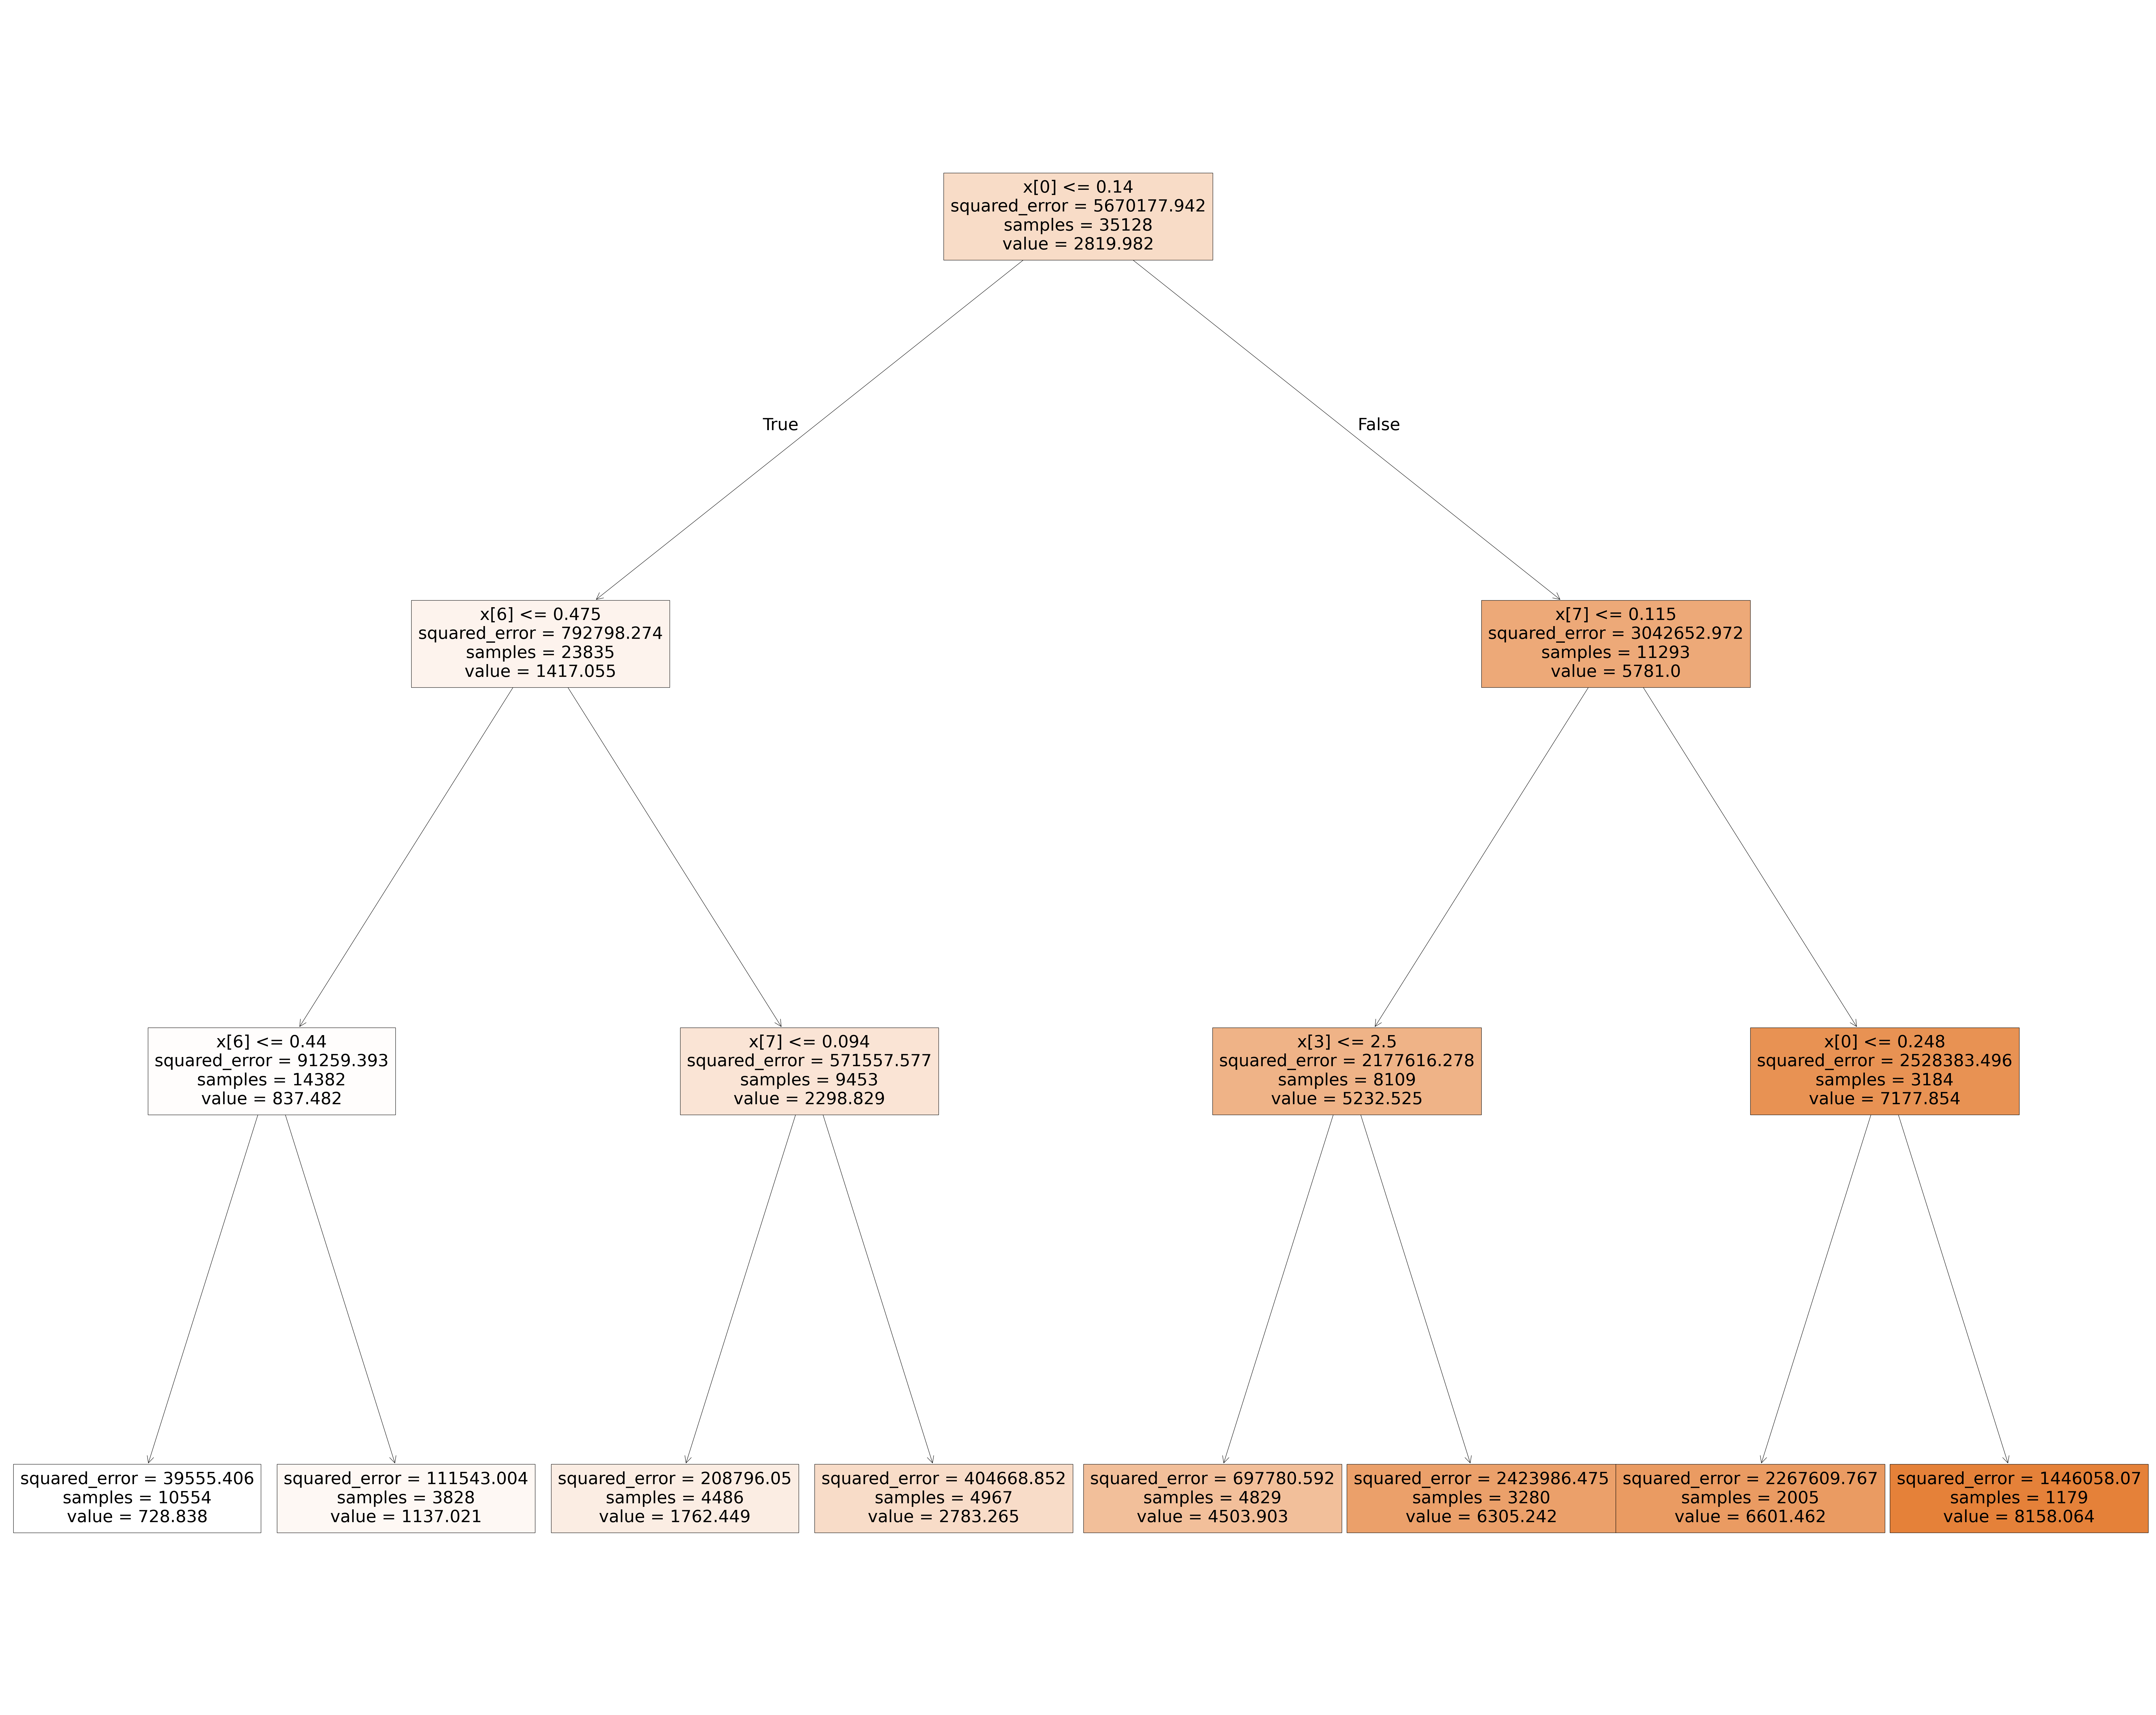

In [39]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(clf_exmp, filled=True)

In [26]:
best_params = study_reg.best_params
clf_reg = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=7, min_samples_split=6,
                      random_state=42)

In [29]:
text_representation = tree.export_text(clf_reg)
print(text_representation)

|--- feature_0 <= 0.14
|   |--- feature_6 <= 0.47
|   |   |--- feature_6 <= 0.44
|   |   |   |--- feature_6 <= 0.41
|   |   |   |   |--- feature_3 <= 5.50
|   |   |   |   |   |--- feature_6 <= 0.40
|   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.38
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.36
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.36
|   |   |   |   |   |   |   |   |   |   |   |--- value: [398.62]
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.36
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated b

## Ансамбль BaggingRegressor

Bagging — это метод ансамблевого обучения, который уменьшает дисперсию (а следствие переобучение) модели, обучая несколько независимых базовых моделей на случайных подвыборках данных и объединяя их предсказания.

Данные разбиваются на случайные подвыборки с возвращением, то есть один объект может попасть в подвыборку несколько раз, а другие могут быть исключены.

Для каждой подвыборки обучается отдельная базовая модель. Каждая модель обучается независимо от других.

In [42]:
bagging_reg = BaggingRegressor(
    clf_reg,
    n_estimators=10,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)
bagging_reg.fit(X_train_reg, y_train_reg)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=14,
                                                 min_samples_leaf=7,
                                                 min_samples_split=6,
                                                 random_state=42),
                 max_samples=0.8, n_jobs=-1, random_state=42)

In [47]:
y_pred_reg = bagging_reg.predict(X_test_reg)

In [48]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 189.4809319590603
MSE: 108755.61961746031
RMSE: 329.7811692887578
MAPE: 0.26570253252485804
R^2: 0.98


# Ансамбль GradientBoostingRegressor

Градиентный бустинг строит последовательность моделей, где каждая следующая модель исправляет ошибки предыдущих, минимизируя функцию потерь с помощью градиентного спуска.\

Начинается с инициализации простой модели. Последовательно добавляются деревья решений, каждое из которых обучается на остатках (градиентах функции потерь для регрессии среднеквадратичная ошибка, для классификации логарифмическая потеря -1/N * sum (log(Pi))) предыдущих моделей.

In [49]:
grad_boosting_regr = GradientBoostingRegressor(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
grad_boosting_regr.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(n_estimators=20, random_state=42)

In [50]:
y_pred_reg = grad_boosting_regr.predict(X_test_reg)

In [51]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 439.4762918398529
MSE: 405674.41873268585
RMSE: 636.9257560600653
MAPE: 0.5126523114173768
R^2: 0.93


# Ансамбль StackingRegressor

Stacking объединяет предсказания нескольких разнородных моделей с помощью мета-модели, которая обучается на их выходах.

На первом уровне обучаются несколько базовых моделей на обучающих данных.

Предсказания базовых моделей  собираются и используются как новые признаки для обучения мета-модели (например, линейной регрессии или логистической регрессии).

In [58]:
stacking_reg = StackingRegressor(
    estimators=[
        ('dt', clf_reg),
        ('lr', LinearRegression())],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

In [59]:
stacking_reg.fit(X_train_reg, y_train_reg)

StackingRegressor(estimators=[('dt',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_samples_leaf=7,
                                                     min_samples_split=6,
                                                     random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [60]:
y_pred_reg = stacking_reg.predict(X_test_reg)

In [61]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 205.85280415767298
MSE: 123911.61227992148
RMSE: 352.01081273154307
MAPE: 0.27950747844389806
R^2: 0.98


# CatBoost Regressor

Использует градиентный бустинг с деревьями решений.

Данные случайным образом перемешиваются, чтобы избежать переобучения.

Категориальные признаки кодируются на основе целевой переменной с учетом порядка объектов, добавляя регуляризацию для сглаживания.

Поддерживает комбинации категориальных признаков, создаваемые жадным алгоритмом во время построения деревьев, что улучшает учет взаимосвязей между признаками.

Аналогично градиентному спуску и другим методам бустинга, суммируются взвешенные предсказания всех деревьев.

In [81]:
cat_boost_reg = CatBoostRegressor(iterations=100)
cat_boost_reg.fit(X_train_reg, y_train_reg)

Learning rate set to 0.467082
0:	learn: 1415.8980091	total: 141ms	remaining: 14s
1:	learn: 917.7369562	total: 143ms	remaining: 7.03s
2:	learn: 667.4658721	total: 146ms	remaining: 4.72s
3:	learn: 550.3134777	total: 148ms	remaining: 3.56s
4:	learn: 485.0241703	total: 151ms	remaining: 2.87s
5:	learn: 453.5310333	total: 153ms	remaining: 2.4s
6:	learn: 431.5871556	total: 156ms	remaining: 2.07s
7:	learn: 418.0531115	total: 159ms	remaining: 1.82s
8:	learn: 409.2215881	total: 161ms	remaining: 1.63s
9:	learn: 400.0506693	total: 163ms	remaining: 1.47s
10:	learn: 389.5605754	total: 166ms	remaining: 1.34s
11:	learn: 382.5548770	total: 168ms	remaining: 1.24s
12:	learn: 375.8694874	total: 171ms	remaining: 1.14s
13:	learn: 371.3348575	total: 174ms	remaining: 1.07s
14:	learn: 365.2546885	total: 176ms	remaining: 999ms
15:	learn: 361.8933622	total: 179ms	remaining: 939ms
16:	learn: 360.4043335	total: 181ms	remaining: 886ms
17:	learn: 356.9197486	total: 184ms	remaining: 837ms
18:	learn: 354.4991324	total

In [82]:
y_pred_reg = cat_boost_reg.predict(X_test_reg)

In [83]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 182.2600903337136
MSE: 91488.84539978733
RMSE: 302.47123069771004
MAPE: 0.26794600088142034
R^2: 0.98


# XGBoost Regressor

Использует градиентный бустинг с деревьями решений, добавляя регуляризацию для предотвращения переобучения.

Оптимизирует функцию потерь с учетом градиентов, что делает обучение более точным.

Поддерживает пропущенные значения, автоматически определяя оптимальное направление для них.

In [ ]:
xgb_reg = xgboost.XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred_reg = xgb_reg.predict(X_test_reg)

In [70]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 177.03106689453125
MSE: 88180.8203125
RMSE: 296.952555659149
MAPE: 0.26515135891505176
R^2: 0.98


# LightGBM Regressor

Оптимизирована для больших датасетов и высокой скорости.

Использует гистограммный подход для разбиения признаков на интервалы, что снижает количество точек разделения и ускоряет обучение.

Деревья строятся листами, может привести к переобучению на малых датасетах.

In [ ]:
lightGBM = lightgbm.LGBMRegressor(n_estimators=100)
lightGBM.fit(X_train_reg, y_train_reg)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 35128, number of used features: 10
[LightGBM] [Info] Start training from score 2819.982037


LGBMRegressor()

In [77]:
y_pred_reg = lightGBM.predict(X_test_reg)

In [79]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred_reg)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred_reg))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred_reg))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred_reg),2)}')

MAE: 179.0162827468558
MSE: 88310.13868287212
RMSE: 297.17021836461356
MAPE: 0.269584234623306
R^2: 0.98


# Построение дерева для классификации

In [5]:
data_cls = pd.read_csv('2dataset.csv')
y_cls = data_cls['RainTomorrow']
X_cls = data_cls.drop(['RainTomorrow', 'Date', 'Location'], axis=1)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state= 42)

In [31]:
study_cls = optuna.create_study(direction='maximize')
study_cls.optimize(lambda trial: objective(trial, X_train_cls, y_train_cls, X_test_cls, y_test_cls, task_type='classification'), n_trials=100)

[I 2025-05-19 18:40:38,601] A new study created in memory with name: no-name-21684b67-4960-448a-8339-dc52b2849cad
[I 2025-05-19 18:40:38,778] Trial 0 finished with value: 0.8616428119790769 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8616428119790769.
[I 2025-05-19 18:40:39,179] Trial 1 finished with value: 0.8634247284014486 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8634247284014486.
[I 2025-05-19 18:40:39,527] Trial 2 finished with value: 0.8634822095763638 and parameters: {'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.8634822095763638.
[I 2025-05-19 18:40:39,909] Trial 3 finished with value: 0.8634247284014486 and parameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.8634822095763638.
[I 2025-05-19 18:40:40,298] Trial 4 finished with value: 0.862677

In [32]:
print(study_cls.best_value)
print(study_cls.best_params)

0.864344427200092
{'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 9}


# Пример DecisionTreeClassifier

In [33]:
best_params_cls = study_cls.best_params
clf_exmp = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
clf_exmp.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=6,
                       random_state=42)

In [34]:
text_representation = tree.export_text(clf_exmp)
print(text_representation)

|--- feature_12 <= 0.77
|   |--- feature_12 <= 0.61
|   |   |--- feature_14 <= 0.50
|   |   |   |--- class: False
|   |   |--- feature_14 >  0.50
|   |   |   |--- class: False
|   |--- feature_12 >  0.61
|   |   |--- feature_6 <= 0.31
|   |   |   |--- class: False
|   |   |--- feature_6 >  0.31
|   |   |   |--- class: False
|--- feature_12 >  0.77
|   |--- feature_12 <= 0.83
|   |   |--- feature_6 <= 0.32
|   |   |   |--- class: False
|   |   |--- feature_6 >  0.32
|   |   |   |--- class: True
|   |--- feature_12 >  0.83
|   |   |--- feature_17 <= 0.31
|   |   |   |--- class: False
|   |   |--- feature_17 >  0.31
|   |   |   |--- class: True



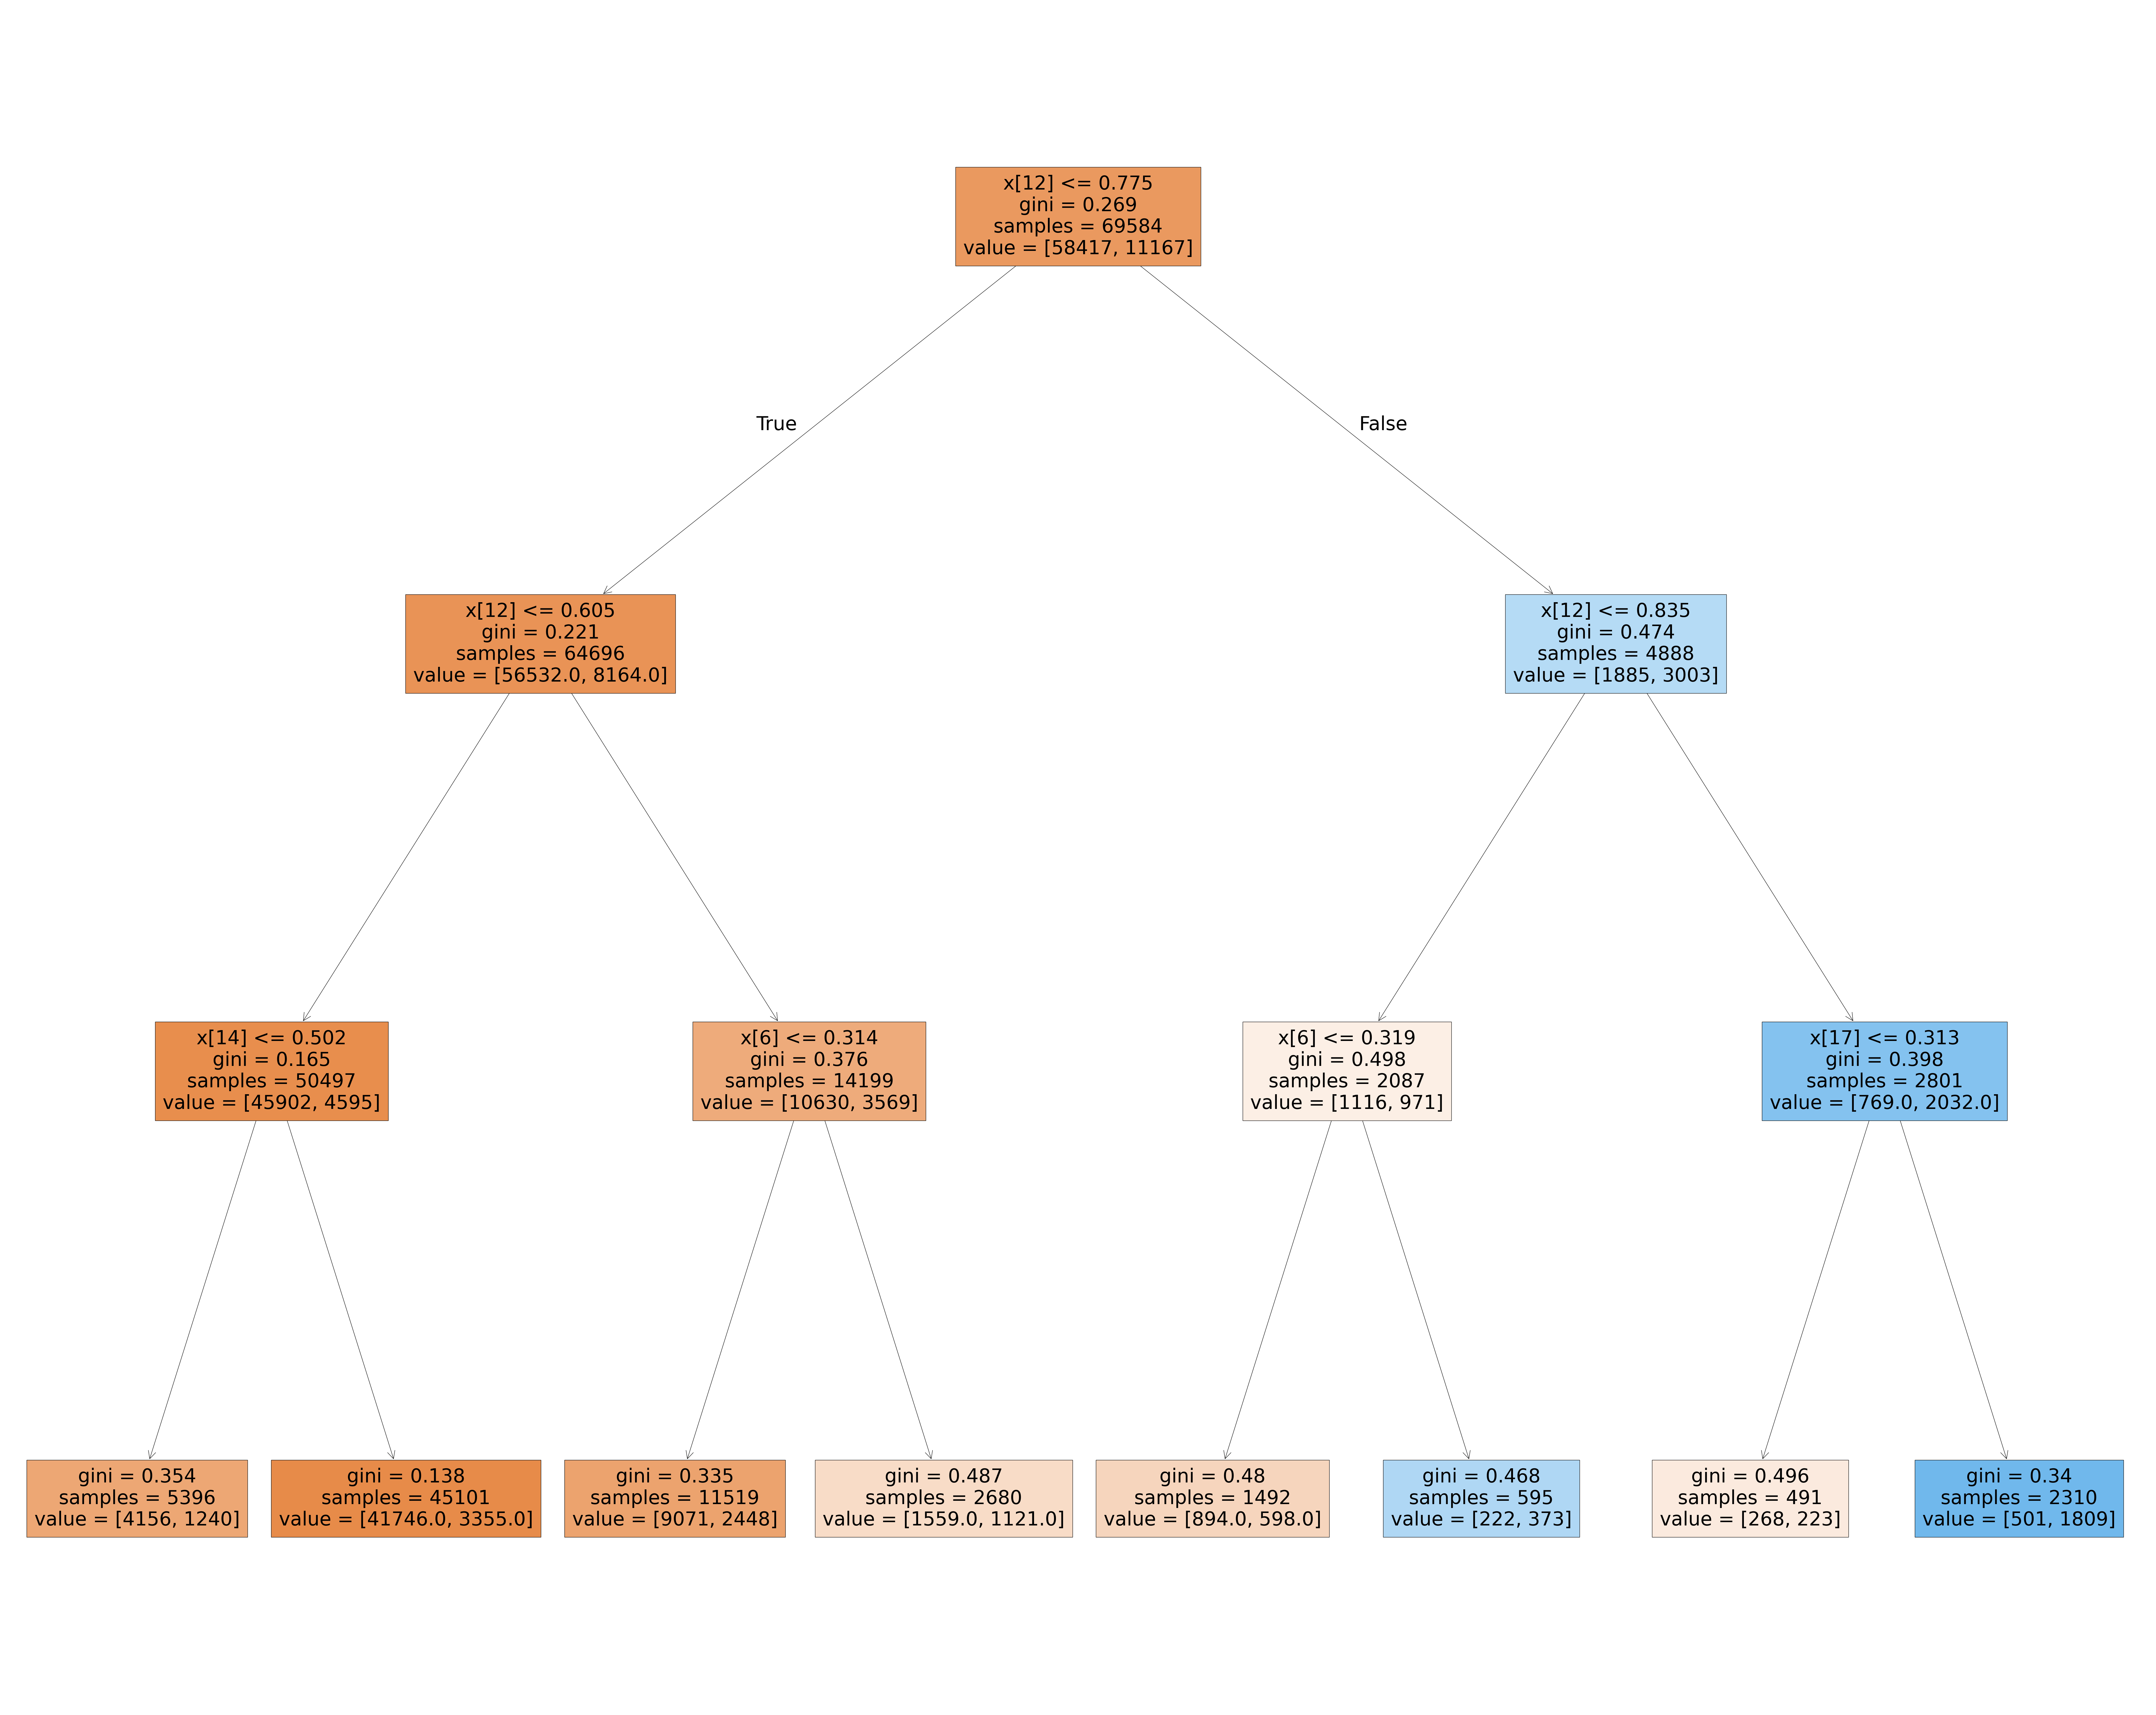

In [35]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(clf_exmp, filled=True)

In [36]:
best_params = study_cls.best_params
clf_cls = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
clf_cls.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=42)

# Ансамбль BaggingClassifier

In [85]:
bagging_cls = BaggingClassifier(
    estimator= clf_cls,
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
bagging_cls.fit(X_train_cls, y_train_cls)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7,
                                                   min_samples_leaf=9,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=50, random_state=42)

In [86]:
y_pred_cls = bagging_cls.predict(X_test_cls)

In [87]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[14329   264]
 [ 2026   778]]
              precision    recall  f1-score   support

       False       0.88      0.98      0.93     14593
        True       0.75      0.28      0.40      2804

    accuracy                           0.87     17397
   macro avg       0.81      0.63      0.67     17397
weighted avg       0.86      0.87      0.84     17397



# Ансамбль GradientBoostingClassifier

In [88]:
grad_boost_cls = GradientBoostingClassifier(
    n_estimators=100
)
grad_boost_cls.fit(X_train_cls, y_train_cls)

GradientBoostingClassifier()

In [89]:
y_pred_cls = grad_boost_cls.predict(X_test_cls)

In [90]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[14221   372]
 [ 1868   936]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.93     14593
        True       0.72      0.33      0.46      2804

    accuracy                           0.87     17397
   macro avg       0.80      0.65      0.69     17397
weighted avg       0.86      0.87      0.85     17397



# Ансамбль StackingClassifier

In [96]:
stacking_cls = StackingClassifier(
    estimators=[
        ('dt', clf_reg),
        ('lr', LinearRegression())],
    final_estimator=KNeighborsClassifier(),
    n_jobs=-1
)
stacking_cls.fit(X_train_cls, y_train_cls)

StackingClassifier(estimators=[('dt',
                                DecisionTreeRegressor(max_depth=14,
                                                      min_samples_leaf=7,
                                                      min_samples_split=6,
                                                      random_state=42)),
                               ('lr', LinearRegression())],
                   final_estimator=KNeighborsClassifier(), n_jobs=-1)

In [97]:
y_pred_cls = stacking_cls.predict(X_test_cls)

In [98]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[13865   728]
 [ 1862   942]]
              precision    recall  f1-score   support

       False       0.88      0.95      0.91     14593
        True       0.56      0.34      0.42      2804

    accuracy                           0.85     17397
   macro avg       0.72      0.64      0.67     17397
weighted avg       0.83      0.85      0.84     17397



# CatBoost Classifier

In [99]:
cat_boost_cls = CatBoostClassifier(iterations=100)
cat_boost_cls.fit(X_train_cls, y_train_cls, eval_set=(X_test_cls, y_test_cls), verbose=10)

Learning rate set to 0.246042
0:	learn: 0.5187847	test: 0.5190732	best: 0.5190732 (0)	total: 8.98ms	remaining: 889ms
10:	learn: 0.3282888	test: 0.3300291	best: 0.3300291 (10)	total: 76.7ms	remaining: 621ms
20:	learn: 0.3170589	test: 0.3205509	best: 0.3205509 (20)	total: 141ms	remaining: 529ms
30:	learn: 0.3102325	test: 0.3156659	best: 0.3156659 (30)	total: 202ms	remaining: 450ms
40:	learn: 0.3044720	test: 0.3119229	best: 0.3119229 (40)	total: 268ms	remaining: 386ms
50:	learn: 0.2996729	test: 0.3092250	best: 0.3092250 (50)	total: 340ms	remaining: 327ms
60:	learn: 0.2947150	test: 0.3069819	best: 0.3069819 (60)	total: 414ms	remaining: 264ms
70:	learn: 0.2905531	test: 0.3060745	best: 0.3060693 (68)	total: 480ms	remaining: 196ms
80:	learn: 0.2865536	test: 0.3049544	best: 0.3049544 (80)	total: 543ms	remaining: 127ms
90:	learn: 0.2829009	test: 0.3040701	best: 0.3040701 (90)	total: 607ms	remaining: 60ms
99:	learn: 0.2799812	test: 0.3034281	best: 0.3034281 (99)	total: 667ms	remaining: 0us

best

In [100]:
y_pred_cls = cat_boost_cls.predict(X_test_cls)

In [101]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[14195   398]
 [ 1751  1053]]
              precision    recall  f1-score   support

       False       0.89      0.97      0.93     14593
        True       0.73      0.38      0.49      2804

    accuracy                           0.88     17397
   macro avg       0.81      0.67      0.71     17397
weighted avg       0.86      0.88      0.86     17397



# XGBoost Classifier

In [ ]:
XGBoost_cls = xgboost.XGBClassifier(n_estimators=100)
XGBoost_cls.fit(X_train_cls, y_train_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [103]:
y_pred_cls = XGBoost_cls.predict(X_test_cls)

In [104]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[14094   499]
 [ 1683  1121]]
              precision    recall  f1-score   support

       False       0.89      0.97      0.93     14593
        True       0.69      0.40      0.51      2804

    accuracy                           0.87     17397
   macro avg       0.79      0.68      0.72     17397
weighted avg       0.86      0.87      0.86     17397



# LightGBM Classifier

In [ ]:
lightGBM = lightgbm.LGBMClassifier(n_estimators=100)
lightGBM.fit(X_train_cls, y_train_cls)

[LightGBM] [Info] Number of positive: 11167, number of negative: 58417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2574
[LightGBM] [Info] Number of data points in the train set: 69584, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160482 -> initscore=-1.654644
[LightGBM] [Info] Start training from score -1.654644


LGBMClassifier()

In [106]:
y_pred_cls = lightGBM.predict(X_test_cls)

In [107]:
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

[[14160   433]
 [ 1728  1076]]
              precision    recall  f1-score   support

       False       0.89      0.97      0.93     14593
        True       0.71      0.38      0.50      2804

    accuracy                           0.88     17397
   macro avg       0.80      0.68      0.71     17397
weighted avg       0.86      0.88      0.86     17397



# Кастомная реализация CART

In [15]:
class Unit:
    def __init__(self, index=None, threshold=None, left=None, right=None, value=None):
        self.index = index
        self.threshold = threshold
        self.left = left          
        self.right = right        
        self.value = value 

def gini(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def stop_recursion_clf(y):
    values, counts = np.unique(y, return_counts=True)
    return Unit(value=values[np.argmax(counts)])

def stop_recursion_reg(y):
    return Unit(value=np.mean(y))

stop_functions = {
    "classification": lambda y: stop_recursion_clf(y),
    "regression": lambda y: stop_recursion_reg(y)
}

class DecisionTree:
    def __init__(self, task = 'classification', max_depth=None, min_samples_split=2):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        
        self.stop_function = {
            "classification": lambda y: stop_recursion_clf(y),
            "regression": lambda y: stop_recursion_reg(y)
        }[task]

        self.gain = {
            "classification": lambda y, left_idx, right_idx:  gini(y) - (len(y[left_idx])/len(y) * gini(y[left_idx]) + len(y[right_idx])/len(y) * gini(y[right_idx])),
            "regression": lambda y, left_idx, right_idx: mse(y) - (len(y[left_idx])/len(y) * mse(y[left_idx]) + len(y[right_idx])/len(y) * mse(y[right_idx]))
        }[task]

        self.stop_no_split = {
            "classification": lambda y: y[0],
            "regression": lambda y: np.mean(y)
        }[task]
    
    def _best_split(self, X, y):
        best_gain = -np.inf
        best_index, best_threshold = None, None

        for index in range(X.shape[1]):
            thresholds = np.unique(X[:, index])
            for threshold in thresholds:
                left_idx = X[:, index] <= threshold
                right_idx = ~left_idx
                
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                gain = self.gain(y, left_idx, right_idx)

                if gain > best_gain:
                    best_gain = gain
                    best_index = index
                    best_threshold = threshold

        return best_index, best_threshold

    def _build_tree(self, X, y, depth=0):

        if (self.max_depth and depth >= self.max_depth) or len(y) < self.min_samples_split:
            return self.stop_function(y)

        index, threshold = self._best_split(X, y)

        if index is None:
            return Unit(value=self.stop_no_split(y))

        left_idx = X[:, index] <= threshold
        right_idx = ~left_idx

        left = self._build_tree(X[left_idx], y[left_idx], depth+1)
        right = self._build_tree(X[right_idx], y[right_idx], depth+1)

        return Unit(index, threshold, left, right)
    
    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict_sample(self, x, Unit):
        if Unit.value is not None:
            return Unit.value
        if x[Unit.index] <= Unit.threshold:
            return self._predict_sample(x, Unit.left)
        else:
            return self._predict_sample(x, Unit.right)
    
    def predict(self, X):
        return np.array([self._predict_sample(x, self.root) for x in X])

In [16]:
dtc = DecisionTree(task='classification', max_depth=5)
dtc.fit(X_train_cls.values, y_train_cls.values)
y_pred = dtc.predict(X_test_cls.values)

In [10]:
print(confusion_matrix(y_test_cls, y_pred))
print(classification_report(y_test_cls, y_pred))

[[14367   226]
 [ 2154   650]]
              precision    recall  f1-score   support

       False       0.87      0.98      0.92     14593
        True       0.74      0.23      0.35      2804

    accuracy                           0.86     17397
   macro avg       0.81      0.61      0.64     17397
weighted avg       0.85      0.86      0.83     17397



In [113]:
dtc = DecisionTree(task='regression', max_depth=5)
dtc.fit(X_train_reg.values, y_train_reg.values)
y_pred = dtc.predict(X_test_reg.values)

In [114]:
print(f'MAE: {mean_absolute_error(y_test_reg, y_pred)}')
print(f'MSE: {mean_squared_error(y_test_reg, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_reg, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_reg, y_pred))}')
print(f'R^2: {round(r2_score(y_test_reg, y_pred),2)}')

MAE: 358.6916834793469
MSE: 314811.5468504371
RMSE: 561.0806954890153
MAPE: 0.38989940567401343
R^2: 0.94


Вывод по регрессии:

Лучшая модель XGBoost Regressor.
XGBoost показывает наименьший MAE (177.03), что важно для минимизации средней ошибки предсказания, и близкие к лучшим значения MSE и RMSE. Модель наиболее сбалансирована по точности и устойчивости. LightGBM Regressor также демонстрирует отличные результаты (минимальные MSE и RMSE), но XGBoost выигрывает за счет меньшего MAE. CatBoost близок, но слегка уступает по всем метрикам.

Вывод по Классификации:

Лучшая модель XGBoost Classifier.
XGBoost демонстрирует лучший F1-score (0.51) и наивысший recall (0.40) для True. CatBoost и LightGBM показывают сопоставимые результаты (accuracy 0.88 и F1-score 0.49–0.50), но XGBoost выигрывает за счет лучшего recall, что делает его предпочтительным для задач, где важна идентификация положительного класса.